# Bem vindos ao mini curso de <span style="font-size:1em; font-weight:bold; background: linear-gradient(90deg, #2E86C1, #48C9B0, #F4D03F); -webkit-background-clip: text; color: transparent;">Análise de Dados</span>!

- Nome: Marcos Pasa

- Email: marcospasa130@gmail.coim

- GitHub: https://github.com/marcos1561

- Sala no Campus Vale: M207
    
    Quando geralmente estou na sala:
    - Segunda e Quarta: Durante a tarde
    - Terça e Quinta: Durante a manhã
---

# <u>Setup Remoto</u> para as aulas
Rode os notebooks pelo Google Colab: https://colab.google/

# <u>Setup Local</u> para as aulas

## Instalando o `Python`

### Linux
Provavelmente já possui `Python`, mas pode ser instalado com o `apt`

```bash
sudo apt update
sudo apt install python3
```

### Windows
Baixe o python aqui: https://www.python.org/downloads/windows/

## Criando ambiente virtual (Opcional, mas recomendado)
Vamos organizar todo o conteúdo deste curso dentro de alguma pasta, onde será criado um ambiente virtual para encapsular as dependência e impedir conflitos com outros projetos
```bash
cd caminho/para/a/pasta/das/aulas
pip -m venv venv # Cria um ambiente virtual na pasta atual chamado de `venv`
```
após criar o ambiente, precisamos ativá-lo

| OS      | Comando                           |
|---------|-----------------------------------|
| Linux   | `source <venv>/bin/activate`      |
| Windows | `<venv>\Scripts\Activate.ps1`     |

<br>

> OBS: No windows, talvez seja necessário mudar a política de execução: 
> ```PS
> Set-ExecutionPolicy -ExecutionPolicy RemoteSigned -Scope CurrentUser
> ```

> Mais informações sobre ambientes virtuais: https://docs.python.org/pt-br/dev/library/venv.html#creating-virtual-environments

## Instalando o `Jupyter`
Instale com o pip
```bash
pip install notebook
```
O Jupyter Notebook pode ser iniciado da seguinte forma
```bash
jupyter notebook
```

---

# Numpy

- Pacote **fundamental** em computação científica em Python.

- Nos permite construir e operar com arrays n-dimensionais.

- O astro do Numpy é o objeto `numpy.ndarray`.

- Documentação oficial do Numpy: https://numpy.org/doc/stable/index.html 

## Qual a diferença entre `ndarray` e `list`?
- **Tamanho**: As listas padrões do python (`list`) se comportam como um array de tamanho dinâmica, ou seja, o seu tamanho pode ser variado em tempo de execução, já o `ndarray` possui tamanho fixo, mudar seu tamanho implica em criar um nova cópia e deletar a original.

- **Tipo dos elementos**: `list` pode conter elementos de tipos variados, já o `ndarray` exige que todos os elementos sejam do mesmo tipo. Na maioria dos casos, isso implica que o espaço ocupado na memória de um elemento do `ndarray` é sempre o mesmo.

- **Velocidade**: Operações entre `ndarray` usam `C` por baixo dos panos, o que torna o uso do Numpy muito mais eficiente do que as listas do Python.

In [3]:
import time
import numpy as np

def time_function(name, n, func, args):
    '''
    Mede o tempo de execução médio da função `func`
    entre `n` chamadas com os argumentos `args`.
    '''
    times = np.empty(n)
    for i in range(n):
        start = time.perf_counter()
        func(*args)
        end = time.perf_counter()
        times[i] = end - start
    times *= 1000
    mean_time = times.mean()
    mean_std = times.std() / n**.5
    print(f"{name}: {mean_time:.3f} ± {mean_std:.3f} ms")

In [30]:
'''
Comparando a velocidade entre `list` e `ndarray` usando
a multiplicação par a par entre vetores.
'''

def using_slow_python(a, b, c):
    for i in range(len(a)):
        c[i] = a[i] * b[i]

def using_fast_numpy(a, b, c):
    c[:] = a * b
    

num_elements = 10000

# Criando as litas do python 
a_list = [i for i in range(num_elements)]
b_list = [i*2 for i in range(num_elements)]
c_list = [0 for _ in range(num_elements)]
python_args = (a_list, b_list, c_list)

# Criando os arrays do numpy
a_array = np.arange(num_elements)
b_array = 2 * a_array
c_array = np.empty(num_elements, int)
numpy_args = (a_array, b_array, c_array)

n = 100
time_function("python list", n, using_slow_python, python_args)
time_function("numpy      ", n, using_fast_numpy, numpy_args)
time_function("numpy loop ", n, using_slow_python, numpy_args)

python list: 4.801 ± 0.090 ms
numpy      : 0.051 ± 0.003 ms
numpy loop : 16.707 ± 0.339 ms


## Principais funcionalidades do Numpy: `Vectorization` e `Broadcasting`

### Vectorization
Em poucas palavras, vetorização é o ato de escrever código sem explicitar loops, indexação, etc., como `c = b * a` - obviamente os loops eventualmente acontecem, mas quando o código está vetorizado, eles ocorrem em código otimizado e pré-compilado em `C`. 

### Broadcasting
Broadcasting se refere a como o Numpy lida com operações entre arrays com diferentes tamanhos. Na maioria dos casos, o menor array é "transmitido" (__broadcast__) pelo maior array, para que tenham tamanhos compatíveis.

Ex: Adicionar um vetor em cada linha de uma matrix, ou seja, algo com essa cara:
$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
+
\begin{bmatrix}
10 & 20 & 30 \\
10 & 20 & 30 \\
10 & 20 & 30 \\
\end{bmatrix}
=
\begin{bmatrix}
11 & 22 & 33 \\
14 & 25 & 36 \\
17 & 28 & 39
\end{bmatrix}
$$

In [31]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

b = np.array([10, 20, 30])

print("a.shape:", a.shape)
print("b.shape:", b.shape)
print("a + b:\n", a + b)

a.shape: (3, 3)
b.shape: (3,)
a + b:
 [[11 22 33]
 [14 25 36]
 [17 28 39]]


Repare que `b` é um vetor unidimensional e não uma matrix, mas mesmo assim o código funcionou, `b` foi transmitido pelas linhas de `a` permitindo a operação. O broadcast funciona da seguinte forma:

- As dimensões (atributo `.shape` dos arrays) de `a` e `b` são comparadas, uma por uma, da direita para esquerda .
- A comparação de uma dimensão é válida se os seus tamanhos são iguais ou uma delas possui tamanho 1, no último caso, o resultado da comparação é o tamanho da maior dimensão.
- Quando o número de dimensões não é o mesmo entre os arrays, dimensões com tamanho 1 são adicionas à esquerda do menor array, até ambos possuírem o mesmo número de dimensões. 

No exemplo acima, temos `a.shape = (3, 3)` e `b.shape = (3,)`, então, primeiro é adicionado uma dimensão de tamanho 1 em `b` (resultando no shape (1, 3)) e, em sequência, é feito a comparação dimensão por dimensão
| Array     | Shape   |
|-----------|---------|
| a         | 3 x 3   |
| b         | 1 x 3   |
| Resultado | 3 x 3   |

ou seja, o vetor `b` foi repetido 3 vezes nas linhas de `a` na operação `a + b`.

> OBS: O broadcasting é inteligente o suficiente para não gerar cópias desnecessárias. Dependendo dos tamanhos dos arrays, usar
> broadcast é mais rápido do que manualmente duplicar o menor array.

In [37]:
"""
Testando a velocidade da soma de matrix e vetor, com e sem broadcast
"""

def func(a, b):
    a + b

array_size = 5000

a = np.random.random((array_size, array_size)) # Matrix array_size x array_size aleatória
b_vec = np.random.random(array_size) # Vetor aleatório de tamanho array_size 
b_matrix = np.tile(b_vec, (array_size, 1)) # Matrix array_size x array_size criado repetindo o vetor b

n = 200
time_function("Com Broadcast", n, func, (a, b_vec))
time_function("Sem Broadcast", n, func, (a, b_matrix))

Com Broadcast: 292.630 ± 4.271 ms
Sem Broadcast: 250.419 ± 3.610 ms


### Exercício: 1

Anteriormente, "deslocamos" todas as linhas de uma matrix por um vetor, agora seu objetivo é deslocar todas as colunas de uma matrix por um vetor.

Crie a seguinte matrix 3x3

$$
a = \begin{bmatrix}
0 & 1 & 2 \\
3 & 4 & 5 \\
6 & 7 & 8
\end{bmatrix}
$$

e desloque todas as colunas pelo vetor

$$
b = \begin{bmatrix}
0 & 1 & 2 \\
\end{bmatrix}
$$

o resultado deve dar

$$
\begin{bmatrix}
0 & 1 & 2 \\
4 & 5 & 6 \\
8 & 9 & 10
\end{bmatrix}
$$

In [ ]:
# Escreva seu código aqui

<details>
<summary>Solução: Clique para expandir</summary>

```python
a = np.arange(9).reshape(3, 3)
b = np.arange(3).reshape(3, 1)

a + b
```
</details>

## Como um `np.ndarray` está organizado na memória?

Os dados de arrays do Numpy estão organizadas na memória de forma compacta, os elementos estão lado a lado.
Para saber a ordem dos elementos na memória, podemos chamar os métodos `.flatten()` ou `.ravel()`, que linearizam o array em questão, ou seja, retornam um array 1-D que contém os dados do array original.

In [42]:
a = np.arange(9).reshape(3, 3)
print(a)
print(a.flatten())

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 1 2 3 4 5 6 7 8]


pelo resultado acima, vemos que a organização é _row major_, ou seja, os elementos estão dispostos na memória linha por linha. Isso significa que iteração nas colunas (mantendo uma linha fixa) é mais rápido do que iteração nas linhas (mantendo uma coluna fixa) 

In [44]:
"""
Comparando velocidade entre iterar linha por linha e coluna por coluna.
"""

def iter_col_by_col(a):
    num_rows, num_cols = a.shape
    sum = 0
    for row in range(num_rows):
        for col in range(num_cols):
            sum += a[row, col]

def iter_row_by_row(a):
    num_rows, num_cols = a.shape
    sum = 0
    for col in range(num_cols):
        for row in range(num_rows):
            sum += a[row, col]

array_n = 300
a = np.arange(array_n**2).reshape(array_n, array_n)

n = 100
time_function("Coluna por coluna:", n, iter_col_by_col, (a,))
time_function("Linha por linha  :", n, iter_row_by_row, (a,))

Coluna por coluna:: 76.019 ± 1.397 ms
Linha por linha  :: 80.705 ± 0.783 ms


## Indexação, Fatiamento, Cópias e Visualizações (Indexing, Slicing, Copies and Views)

Podemos indexar e fatiar um array de várias formas

In [125]:
a = np.arange(10)

print("a =", a)

# Número inteiro
print("a[1] =", a[1])

# Lista de inteiros
print("a[[1, 3, 4]] =", a[[1, 3, 4]])

# Máscara
print("a[a>2] =", a[a>2])

# Fatia
print("a[:3] =", a[:3])

# Arrays com várias dimensões. Se `idx` for o array utilizando como
# índice, o resultado `b = a[idx]` tem o mesmo shape de `idx` e b[i, j] = a[idx[i, j]] 
print("a[[[1, 2], [3, 2]]] = \n", a[[[1, 2], [3, 2]]])

print("="*20)

b = np.arange(3*3).reshape(3, 3)

print("b =\n", b)

# Indexação multidimensional
print("b[1, 2] =", b[1, 2])

# Indexação multidimensional com arrays 1-D
print("b[[1, 2], [2, 1]] =", b[[1, 2], [2, 1]])

a = [0 1 2 3 4 5 6 7 8 9]
a[1] = 1
a[[1, 3, 4]] = [1 3 4]
a[a>2] = [3 4 5 6 7 8 9]
a[:3] = [0 1 2]
a[[[1, 2], [3, 2]]] = 
 [[1 2]
 [3 2]]
b =
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
b[1, 2] = 5
b[[1, 2], [2, 1]] = [5 7]


É muito importante sabermos quando uma operação com arrays retorna uma cópia ou uma visualização

In [126]:
# Fatiamento retorna visualização
print("Fatiamento")
a = np.arange(10)
b = a[:3]
b[0] = -1
print("a =", a)
print("b = ", b)

print("="*20)

# Reshape retorna visualização
print("Reshape")
a = np.arange(10)
b = a.reshape(2, 5)
b[1, 1] = -1
print("a =", a)
print("b = ", b)

print("="*20)

# Indexação com arrays retorna cópia
print("Indexação com arrays")
a = np.arange(10)
b = a[[1, 2, 4]]
b[0] = -1
print("a =", a)
print("b = ", b)

print("="*20)

# Podemos forçar cópia com np.copy
print("Forçando cópia")
a = np.arange(10)
b = np.copy(a[:3])
b[0] = -1
print("a =", a)
print("b = ", b)

Fatiamento
a = [-1  1  2  3  4  5  6  7  8  9]
b =  [-1  1  2]
Reshape
a = [ 0  1  2  3  4  5 -1  7  8  9]
b =  [[ 0  1  2  3  4]
 [ 5 -1  7  8  9]]
Indexação com arrays
a = [0 1 2 3 4 5 6 7 8 9]
b =  [-1  2  4]
Forçando cópia
a = [0 1 2 3 4 5 6 7 8 9]
b =  [-1  1  2]


As visualizações podem ser utilizadas para mudar parte ou todo o array

In [127]:
def change_all_values_correct(a, b):
    a[:] = b

def change_all_values_wrong(a, b):
    a = b

a = np.arange(10)
b = np.full_like(a, -1)

print(a)
change_all_values_correct(a, b)
print(a)

print("="*20)

a = np.arange(10)

print(a)
change_all_values_wrong(a, b)
print(a)


[0 1 2 3 4 5 6 7 8 9]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### Exercício 2:

Uma cor pode ser representada por três números (o famoso formato RGB),
então um array com `shape=(n, 3)` pode ser interpretado com uma paleta de n cores.  

Dado uma paleta de cores, uma imagem pode ser representada por um array 2-D cujos elementos são índices da paleta de cores. Por exemplo

``` python
simple_palette = np.array([
    [255, 0, 0], # Vermelho
    [0, 255, 0], # Verde
    [0, 0, 255], # Azul
])

# Exemplo de uma imagem 2 x 2
tiny_image = np.array([
    [0, 1],
    [2, 0]
])
```

O array `tiny_image` corresponde à seguinte imagem:

![Exemplo de imagem 2x2](images/ex_2_aula_1.png)

Agora, sua tarefa é construir o array que de fato contém os dados da imagem, por exemplo, no exemplo acima, o array a ser construído é
``` python
tiny_image_data =np.array([
    [[255, 0, 0], [0, 255, 0]],
    [[0, 0, 255], [255, 0, 0]]
])
```
ou seja, o elemento de índice $(i, j)$ contém a cor da paleta cujo índice é `tiny_image[i, j]`


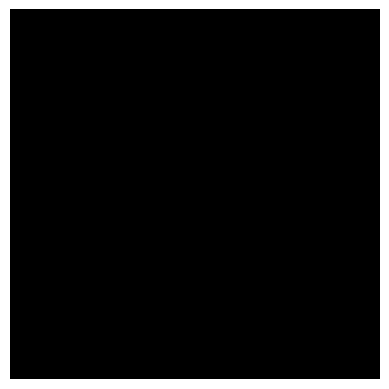

In [4]:
palette = np.array([
    [253, 253, 253],
    [164, 164, 164],
    [122, 122, 122],
    [202, 202, 202],
])

image = np.array([
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,2 ,2 ,0 ,2 ,2 ,0 ,2 ,2 ,2 ,0 ,0 ,2 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,2 ,0 ,0 ,2 ,0 ,2 ,0 ,2 ,0 ,2 ,2 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,2 ,2 ,0 ,2 ,2 ,0 ,2 ,0 ,2 ,0 ,0 ,2 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,2 ,0 ,0 ,2 ,0 ,2 ,0 ,2 ,0 ,0 ,2 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,2 ,2 ,0 ,2 ,2 ,0 ,2 ,2 ,2 ,0 ,0 ,2 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,2 ,1 ,1 ,1 ,1 ,1 ,1 ,2 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,2 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,2 ,2 ,1 ,1 ,1 ,1, 1, 2, 0, 0],
    [0 ,1 ,1 ,1 ,2 ,2 ,1 ,2 ,2 ,2 ,3 ,3 ,3 ,1 ,0 ,0 ,0 ,0 ,3 ,3 ,1 ,3 ,1 ,0 ,0 ,0 ,2 ,1 ,1 ,3 ,1 ,1 ,2 ,1 ,2 ,3, 2, 3, 3, 0],
    [2 ,1 ,1 ,1 ,2 ,2 ,2 ,2 ,1 ,1 ,1 ,1 ,3 ,3 ,3 ,3 ,2 ,0 ,3 ,1 ,2 ,1 ,0 ,2 ,1 ,1 ,1 ,1 ,1 ,2 ,1 ,1 ,1 ,2 ,0 ,3, 2, 3, 1, 0],
    [0 ,1 ,1 ,1 ,1 ,2 ,3 ,2 ,1 ,1 ,1 ,3 ,1 ,1 ,3 ,3 ,3 ,3 ,3 ,3 ,1 ,1 ,3 ,3 ,1 ,3 ,1 ,1 ,1 ,3 ,1 ,1 ,1 ,2 ,1 ,3, 3, 1, 0, 0],
    [0 ,0 ,0 ,1 ,1 ,3 ,1 ,2 ,3 ,1 ,1 ,3 ,3 ,1 ,1 ,2 ,2 ,3 ,2 ,1 ,0 ,1 ,1 ,2 ,1 ,1 ,3 ,3 ,3 ,3 ,3 ,1 ,2 ,1 ,3 ,1, 2, 0, 0, 0],
    [0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,2 ,1 ,1 ,1 ,2 ,0 ,0 ,0 ,3 ,1 ,3 ,1 ,1 ,2 ,2 ,2 ,2 ,2 ,1 ,3 ,1 ,1 ,2 ,3 ,1 ,1 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,2 ,1 ,2 ,0 ,1 ,3 ,1 ,2 ,0 ,0 ,0 ,0 ,3 ,1 ,2 ,2 ,2 ,0 ,0 ,0 ,0 ,0 ,2 ,3 ,1 ,3 ,1 ,2 ,2 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,3 ,1 ,1 ,3 ,2 ,0 ,0 ,0 ,0 ,3 ,1 ,2 ,2 ,2 ,2 ,0 ,0 ,0 ,0 ,1 ,1 ,2 ,3 ,3 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,3 ,1 ,3 ,2 ,0 ,0 ,0 ,0 ,0 ,1 ,2 ,1 ,2 ,2 ,0 ,0 ,0 ,0 ,0 ,1 ,2 ,1 ,3 ,1 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,2 ,3 ,1 ,1 ,1 ,2 ,0 ,0 ,0 ,1 ,2 ,2 ,0 ,2 ,2 ,2 ,0 ,0 ,0 ,3 ,1 ,3 ,1 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,2 ,2 ,2 ,2 ,0 ,0 ,2 ,3 ,2 ,0 ,0 ,2 ,2 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,3 ,2 ,2 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,3 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,2 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0],
])

# Calcule image_data aqui
image_data = [[[0,0,0]]]

# Visualizando a imagem
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(image_data)

<details>
<summary>Solução: Clique para expandir</summary>

```python
image_data = palette[image]
```
</details>

## Exemplo: Mandelbrot Set

Vamos gerar uma imagem do [conjunto de Mandelbrot](https://en.wikipedia.org/wiki/Mandelbrot_set): o conjunto definido pelos pontos $c \in \mathbb{C}$ tal que $f(z) = z^2 + c$ não diverge em um processo de iteração começando em $z = 0$

Para a imagem ficar bem legal, vamos considerar que o processo divergiu se `abs(z) > max_norm` e colorir a imagem de acordo com o tempo que o ponto divergiu

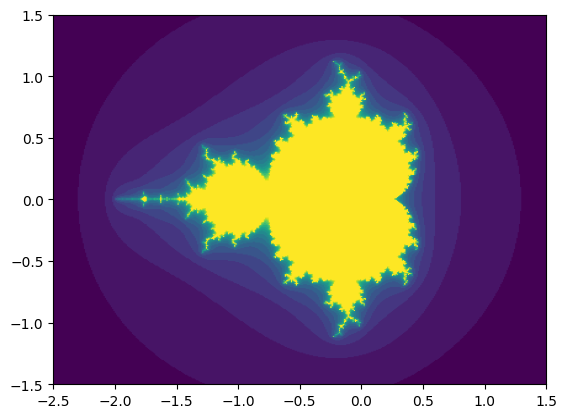

In [46]:
import matplotlib.pyplot as plt

def mandelbrot(image_shape, xlims, ylims, max_iter=20, max_norm=3):
    xs, ys = np.meshgrid(
        np.linspace(*xlims, image_shape[1]),
        np.linspace(*ylims, image_shape[0]),
    )
    cs = xs + ys*1j
    zs = np.zeros_like(cs)

    diverge_time = np.full(image_shape, max_iter, dtype=int)

    for i in range(max_iter):
        zs = zs**2 + cs

        has_diverge = abs(zs) > max_norm
        has_diverge_now = has_diverge & (diverge_time == max_iter)
        diverge_time[has_diverge_now] = i
        zs[has_diverge] = max_norm 

    return diverge_time

xlims = (-2.5, 1.5)
ylims = (-1.5, 1.5)
image_shape = (400, 400)

plt.imshow(mandelbrot(image_shape, xlims, ylims), extent=xlims + ylims)

## Sobre os indexadores especiais `...` e `None`

# Indexador `...`

Um forma de representar as coordenadas dos vértices de uma grade retangular, no plano cartesiano, é através de um array com tamanho igual a `(nx, ny, 2)`, em que `nx` é o número de colunas da grade e `ny` o número de linhas, de tal forma que o elemento de índice `[i, j]` é a posição do vértice de índice `(i, j)` 

<img src="images/grid_pos.png" alt="grade de pontos" width="500"/>


In [11]:
pos = np.array([
    [[1, 3], [2, 3], [3, 3]],
    [[1, 2], [2, 2], [3, 2]],
    [[1, 1], [2, 1], [3, 1]],
])

print("shape:", pos.shape)
print("pos[1, 2]:", pos[1, 2])
pos

shape: (3, 3, 2)
pos[1, 2]: [3 2]


array([[[1, 3],
        [2, 3],
        [3, 3]],

       [[1, 2],
        [2, 2],
        [3, 2]],

       [[1, 1],
        [2, 1],
        [3, 1]]])

é comum ser necessário extrair somente as coordenadas no eixo x dos pontos

In [ ]:
pos_x = pos[:, :, 0]
pos_x

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

neste caso, podemos utilizar o indexador `...`, que expande para quantos `:` forem necessários para tornar a indexação válida

In [ ]:
pos_x_2 = pos[..., 0]
(pos_x_2 == pos_x).all()

np.True_

**OBS**: A geração do array `pos` pode ser facilitada com o `np.meshgrid`

In [14]:
pos_grid = np.meshgrid(
    [1, 2, 3], # Coordenadas das colunas da grade
    [1, 2, 3], # Coordenadas das linhas da grade
)

pos_grid

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]]))

o retorno do `np.meshgrid` são dois arrays, um com as coordenadas no eixo x e outro no eixo y. Para gerar o array com shape `(nx, ny, 2)`, basta usar o `np.stack`

In [54]:
pos = np.stack(pos_grid, axis=-1)
print(pos.shape)
pos

(3, 3, 2)


array([[[1, 1],
        [2, 1],
        [3, 1]],

       [[1, 2],
        [2, 2],
        [3, 2]],

       [[1, 3],
        [2, 3],
        [3, 3]]])

### Indexador `None`

O indexador `None` (ou `np.newaxis`) é usado para adicionar uma nova dimensão ao array. Por exemplo, podemos transformar um vetor 1D em um vetor coluna ou linha:

In [57]:
a = np.arange(10)
print("a.shape:", a.shape)

a_col = a[:, None]
print("a_col.shape:", a_col.shape)

a_row = a[None, :]
print("a_row.shape:", a_row.shape)

a.shape: (10,)
a_col.shape: (10, 1)
a_row.shape: (1, 10)


Isso é útil para operações de broadcasting e para preparar arrays para operações matriciais.

## Exercício 3

Crie as posições dos vértices de uma grade de 3 linhas e 4 colunas (tal que o ponto no canto esquerdo inferior seja $(0, 0)$ e o ponto no canto direito superior seja $(3, 2)$), então desloque cada coluna da grade por um escalar, para ser mais exato, desloque as colunas pelos seguintes valores

| Coluna | Deslocamento |
|--------|-------------|
|   0    |    0.2      |
|   1    |   -0.2      |
|   2    |    0.3      |
|   3    |   -0.1      |

você deve obter a seguinte imagem

![ex_3_pontos](images/ex_3_aula_1.png)

onde os pontos azuis representam a grade original e os laranjas a grade deslocada.

In [62]:
import matplotlib.pyplot as plt

def show_points(points_1, points_2):
    """
    Função para visualizar os pontos. 
    
    Desenha flechas que partem de `points_1` e vão até `points_2`.
    Ambos os pontos devem ser arrays com shape (nx, ny, 2).
    """
    # Linhas da grade
    for y in points_1[:, 0, 1]:
        plt.axhline(y, linestyle="--", c="gray", zorder=-1)

    # Colunas da grade
    for x in points_1[0, :, 0]:
        plt.axvline(x, linestyle="--", c="gray", zorder=-1)
    
    # Flechas
    for i in range(points_1.shape[0]):
        for j in range(points_1.shape[1]):
            plt.arrow(
                points_1[i, j, 0], points_1[i, j, 1],
                points_2[i, j, 0] - points_1[i, j, 0],
                points_2[i, j, 1] - points_1[i, j, 1],
                head_width=0.05, head_length=0.08, length_includes_head=True, color='black'
            )

    # Pontos
    plt.scatter(points_1[..., 0], points_1[..., 1])
    plt.scatter(points_2[..., 0], points_2[..., 1])

In [1]:
# Mão na massa

<details>
<summary>Solução: Clique para expandir</summary>

```python
mesh = np.meshgrid(
    [0, 1, 2, 3],
    [0, 1, 2],
)
points_1 = np.stack(mesh, axis=-1)

values = np.array([0.2, -0.2, 0.3, -0.1])

points_2 = points_1 + values[None, :, None]
```
</details>
